
# <span style="color:rgb(213,80,0)">This script generates Figure 7 and Figure 2 of the Supplementary Information</span>

The figure represents the estimated and interpolated KS  statistics.


The corresponding figure for AD, which is Figure 2 of the Supplementary Information, can be obtained by switching the which\-stat variable below (raw 2) from 'KS' to 'AD'.

## User setting

In [1]:
% select statistics (KS or AD)
which_stat = 'KS';

% select the range of interpolation on the alpha_0 dimension
alphamin   = 0.05;
alphamax   = 0.50;

% select p, nu for the surface fitting
p  = 5;
nu = 20;  % nu = 5; nu = 20;

% select n, for the line fitting
n  = 100;

% select the plotting styles
mymarker = '.';
mymarkersize = 12;
xlimin = 0;
mymarkercolor = 'b';
myfitcolor    = 'k';

% preparation for saving figures; set savein to true to save figures to file
savein  = false;
if savein == true && ~exist('Fig7','dir')
    mkdir('Fig7');
end

## Data preparation

In [2]:
% load the estimated KS or AD statistics for a give v-nu combination
load('ksad');

iiraw = find((ksad.p == p) .* (ksad.nu == nu) .* (ksad.alpha >= alphamin) .* (ksad.alpha <= alphamax));
if isempty(iiraw)
    error('Number of variables or degrees of freedom are out of range');
end

X    = ksad.alpha(iiraw);
Y    = log(ksad.n(iiraw));
Z_KS = ksad.KolmogorovSmirnov(iiraw);
Z_AD = ksad.AndersenDarling(iiraw);

% Create a mesh grid for the fitted surface
[X_mesh, Y_mesh] = meshgrid(linspace(min(X), max(X), 500), ...
                            linspace(min(Y), max(Y), 500));

labx = ' $\alpha_0$ ';
laby = ' $\log n$ ';
tit  = 'Estimated values, for $\nu = 6$ and $p = 5$ ';

if strcmp( which_stat,'KS')
    Z    = Z_KS;
    labz = ' $KS$ ';
elseif strcmp( which_stat,'AD')
    Z = Z_AD;
    labz = ' $AD$ ';
else
    error('error!');
end

## Smoothing

In [3]:
% Set up fittype and options.
ft2     = fittype( 'loess' );
opts2   = fitoptions('Method', 'LowessFit' , ...
                    'Normalize', 'on', ...
                    'Robust', 'off',...
                    'Span', 0.2);
[fitresult2, gof2]  = fit( [X(:), Y(:)], Z(:), ft2, opts2 );
Z_fit2              = fitresult2(X_mesh, Y_mesh);

## Figure 7


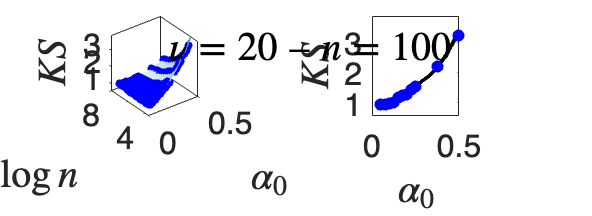

In [4]:
% Create a grid of X values for smooth plotting
alpha_grid = linspace(min(X(:)), max(X(:)), 1000);
% Create the corresponding Y array with fixed value
n_grid = ones(size(alpha_grid)) * n;  % Fixed Y at n=100
% Evaluate the surface fit at these points
Z_curve = fitresult2(alpha_grid, log(n_grid));
% get the KS and AD statistics, for a fixed n
jjraw = find((ksad.p == p) .* (ksad.nu == nu) .* (ksad.alpha >= alphamin) .* (ksad.alpha <= alphamax) .* (ksad.n == n));
if isempty(jjraw)
    error('Number of variables or degrees of freedom are out of range');
end
Xjj    = ksad.alpha(jjraw);
if isequal(which_stat , 'KS')
    Z_jj = ksad.KolmogorovSmirnov(jjraw);
elseif isequal(which_stat , 'AD')
    Z_jj = ksad.AndersenDarling(jjraw);
end

min_Z = min(Z_jj) * 0.6;
max_Z = max(Z_jj) * 1.2;

% Plot
hf = figure;
set(hf,'position',[10,10,1100,400]);

stdfont = 16;
% Smoothed surface using fit 2
subplot(1,2,1);
mesh(X_mesh, Y_mesh, Z_fit2);
%title('Loess 0.2 - normalised','Interpreter','Latex','FontSize',20);
set(gca, 'FontSize', stdfont);
xlabel(labx,'Interpreter','Latex','FontSize',stdfont+4);
ylabel(laby,'Interpreter','Latex','FontSize',stdfont+4);
zlabel(labz,'Interpreter','Latex','FontSize',stdfont+4);
zlim([min_Z,max_Z]);
xlim([xlimin,0.5]);
ylim([3.5,8]);
hold on
plot3(X, Y, Z, mymarker','MarkerSize',mymarkersize,'MarkerEdgeColor',mymarkercolor);
colormap('sky');
box on;
grid off;

% Projection on a fixed n
subplot(1,2,2);
plot(alpha_grid, Z_curve, '-','LineWidth',2,'Color',myfitcolor)  % Plot the curve
hold on
plot(Xjj, Z_jj, mymarker,'MarkerSize',mymarkersize+6,'MarkerEdgeColor',mymarkercolor);
hold off
set(gca, 'FontSize', stdfont);
xlabel(labx,'Interpreter','Latex','FontSize',stdfont+4);
ylabel(labz,'Interpreter','Latex','FontSize',stdfont+4);
ylim([min_Z,max_Z]);
xlim([xlimin,0.5]);
set(gcf, 'Color', 'w');
grid off;
box on;
% make a text object for the title:
xl = get(gca(),'Xlim');
yl = get(gca(),'Ylim');
t = text(xl(2)*0.95,yl(2)*0.95,[' $\nu=' num2str(nu) ' \; \mbox{--} \; n=' num2str(n) '$ '],...
    'VerticalAlignment','top','HorizontalAlignment','right',...
    'Interpreter','Latex', 'FontSize',stdfont+4);

In [5]:

%sgtitle(['Estimated and interpolated critical values for $p=' num2str(v) '$ '],'Interpreter','Latex','FontSize',stdfont+4);

if savein == true
    saveas(gca,['Fig7' filesep 'Figure7' '_' which_stat '_' 'n' num2str(n) '_p' num2str(p) '_nu' num2str(nu) '.fig'],'fig');
    saveas(gca,['Fig7' filesep 'Figure7' '_' which_stat '_' 'n' num2str(n) '_p' num2str(p) '_nu' num2str(nu) '.eps'],'epsc');
    saveas(gca,['Fig7' filesep 'Figure7' '_' which_stat '_' 'n' num2str(n) '_p' num2str(p) '_nu' num2str(nu) '.png'],'png');
end

## Extra figure, for comparing the effect of a different interpolation


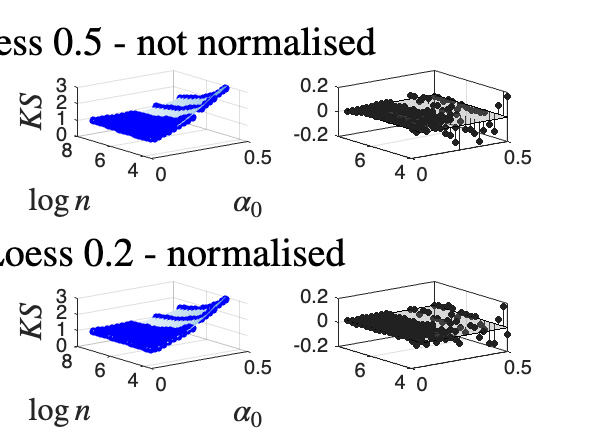

In [6]:
% Lowess Surface Fit (loess with a higher degree of smoothing)
[fitresult1, gof1]  = fit([X(:), Y(:)], Z(:), 'loess', 'Span', 0.5);
Z_fit1              = fitresult1(X_mesh, Y_mesh);

figure;

% Smoothed surface using fit 1
subplot(2,2,1);
%plot(fitresult1,[X(:), Y(:)], Z(:));
mesh(X_mesh, Y_mesh, Z_fit1);
title('Loess 0.5 - not normalised','Interpreter','Latex','FontSize',20);
xlabel(labx,'Interpreter','Latex','FontSize',16);
ylabel(laby,'Interpreter','Latex','FontSize',16);
zlabel(labz,'Interpreter','Latex','FontSize',16);
zlim([0,3]);
xlim([xlimin,0.5]);
ylim([3.5,8]);
hold on
plot3(X, Y, Z, mymarker,'MarkerSize',mymarkersize,'MarkerEdgeColor',mymarkercolor);

subplot(2,2,2);
h1 = plot( fitresult1, [X, Y], Z, 'Style', 'Residual' );
zlim([-0.2,0.2]);
xlim([xlimin,0.5]);

% Smoothed surface using fit 2
subplot(2,2,3);
mesh(X_mesh, Y_mesh, Z_fit2);
title('Loess 0.2 - normalised','Interpreter','Latex','FontSize',20);
xlabel(labx,'Interpreter','Latex','FontSize',16);
ylabel(laby,'Interpreter','Latex','FontSize',16);
zlabel(labz,'Interpreter','Latex','FontSize',16);
zlim([0,3]);
xlim([xlimin,0.5]);
ylim([3.5,8]);
hold on
plot3(X, Y, Z, mymarker','MarkerSize',mymarkersize,'MarkerEdgeColor',mymarkercolor);

subplot(2,2,4);
h2 = plot( fitresult2, [X, Y], Z, 'Style', 'Residual' );
zlim([-0.2,0.2]);
xlim([xlimin,0.5]);

hold off
colormap('sky');